In [72]:
import mlrose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime
import math

# Set random seed
np.random.seed(2)

fitness = mlrose.Queens()

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):
    # Initialize counter
    fitness_cnt = 0
    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):
            # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

def get_data(algorithm, run_times, N=8, **args):
    state = []
    fit = []
    dur = []
    for n in range(run_times):
        start_time = datetime.now()
        fitness = mlrose.Queens()       
        problem_fit = mlrose.DiscreteOpt(length = N, 
                                         fitness_fn = fitness_cust, 
                                         maximize = True, 
                                         max_val = N)
        
        _state, _fit = algorithm(problem_fit, **args)
        time_diff = datetime.now() - start_time
        _dur = time_diff.microseconds/1000

        state.append(_state)
        fit.append(_fit)
        dur.append(_dur)
    return np.mean(fit),np.mean(dur)

def by_max_iters(algorithm, run_times, max_iters, **args):
    fit = []
    dur = []
    for i in max_iters:
        _fit, _dur = get_data(algorithm, run_times, max_iters=i, max_attempts=100, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

def by_max_n(algorithm, run_times, max_ns, **args):
    fit = []
    dur = []
    for i in max_ns:
        _fit, _dur = get_data(algorithm, run_times, N=i, max_iters=500, max_attempts=10, **args)
        fit.append(_fit)
        dur.append(_dur)
    return fit,dur

max_iters=range(0,6000,1000)
max_ns=range(25,250,25)
run_times=1


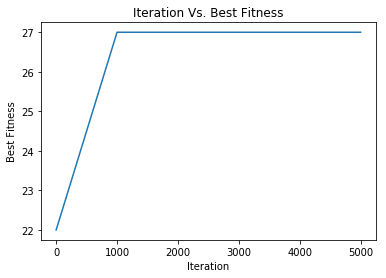

In [77]:
fit_ga, dur_ga = by_max_iters(mlrose.genetic_alg, run_times, max_iters)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(max_iters, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

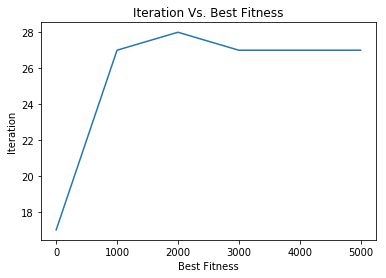

In [78]:
schedule = mlrose.ExpDecay()

fit_sa, dur_sa = by_max_iters(mlrose.simulated_annealing, run_times, max_iters, schedule = schedule)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

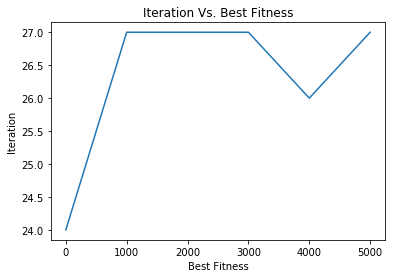

In [79]:
fit_mi, dur_mi = by_max_iters(mlrose.mimic, run_times, max_iters)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_iters, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

        ga    sa  mimic
0     22.0  17.0   24.0
1000  27.0  27.0   27.0
2000  27.0  28.0   27.0
3000  27.0  27.0   27.0
4000  27.0  27.0   26.0
5000  27.0  27.0   27.0


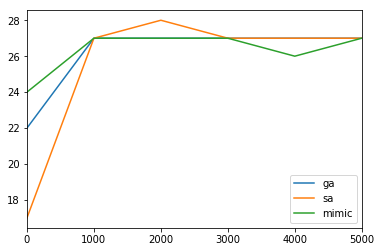

In [80]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=max_iters)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=max_iters)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)


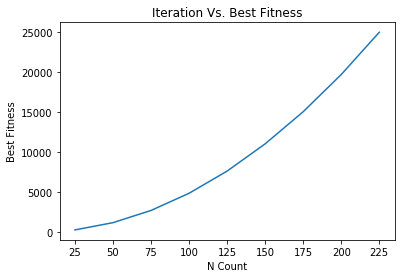

In [81]:
fit_ga, dur_ga = by_max_n(mlrose.genetic_alg, run_times, max_ns)
plt.xlabel('N Count')
plt.ylabel('Best Fitness')
plt.plot(max_ns, fit_ga)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()



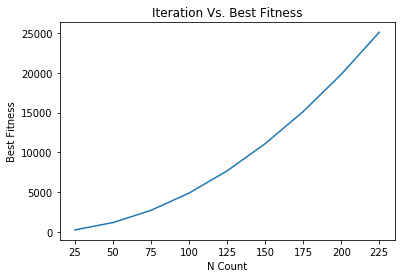

In [82]:
schedule = mlrose.ExpDecay()

fit_sa, dur_sa = by_max_n(mlrose.simulated_annealing, run_times, max_ns, schedule = schedule)
plt.xlabel('N Count')
plt.ylabel('Best Fitness')
plt.plot(max_ns, fit_sa)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

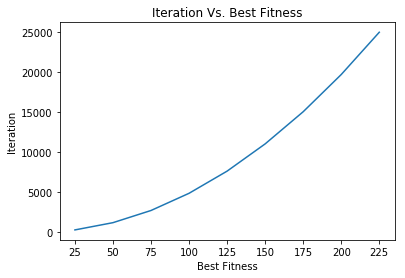

In [83]:
fit_mi, dur_mi = by_max_n(mlrose.mimic, run_times, max_ns)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(max_ns, fit_mi)
plt.title('Iteration Vs. Best Fitness')
# plt.legend()
plt.show()

          ga       sa    mimic
25     285.0    288.0    288.0
50    1192.0   1210.0   1194.0
75    2719.0   2745.0   2716.0
100   4866.0   4906.0   4864.0
125   7640.0   7692.0   7634.0
150  11047.0  11100.0  11037.0
175  15065.0  15133.0  15056.0
200  19715.0  19801.0  19705.0
225  25002.0  25078.0  24988.0


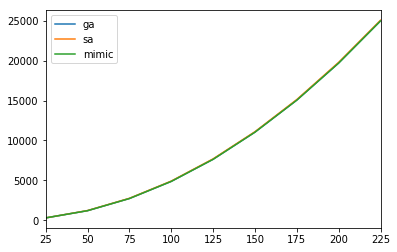

In [84]:
fitness_df = pd.DataFrame(np.column_stack([fit_ga,fit_sa,fit_mi]),columns=['ga','sa','mimic'],index=max_ns)
duration_df = pd.DataFrame(np.column_stack([dur_ga,dur_sa,dur_mi]),columns=['ga','sa','mimic'],index=max_ns)
print(fitness_df)

fig, ax = plt.subplots()
fitness_df.plot(ax=ax)